In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Abalone.csv')                        #loading dataset

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum()                                     #checking for null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

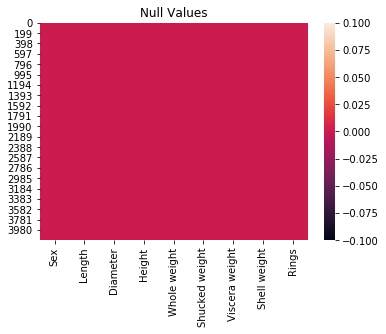

In [8]:
sns.heatmap(df.isnull())                                      #no null values present in dataset
plt.title('Null Values')
plt.show()

In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# EDA

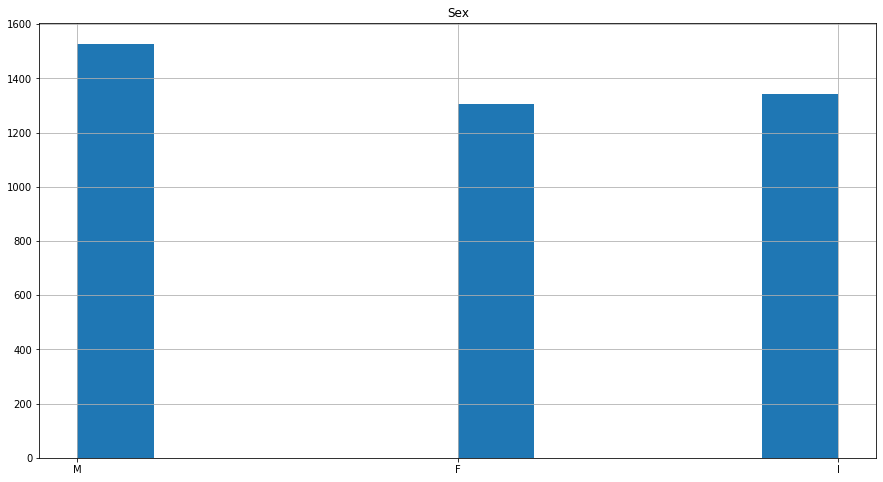

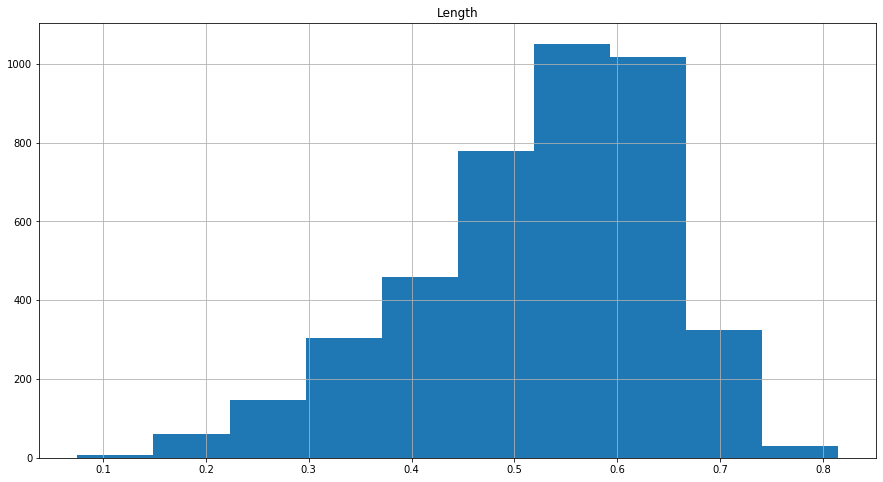

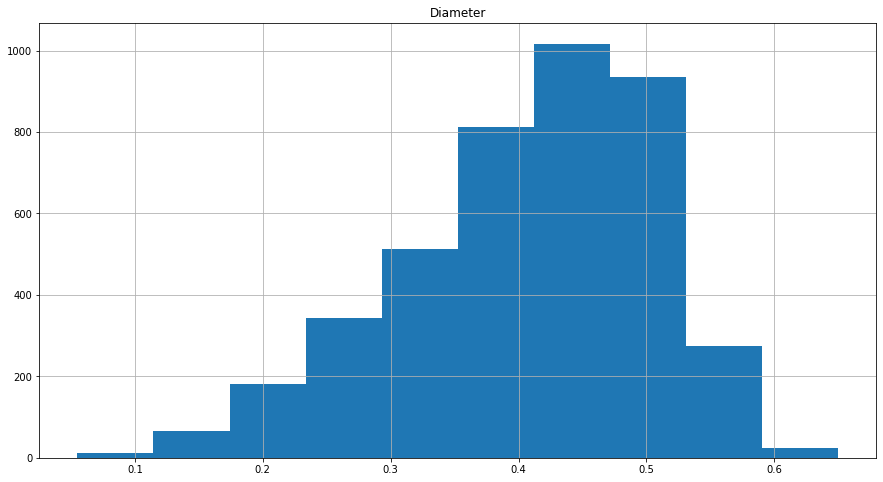

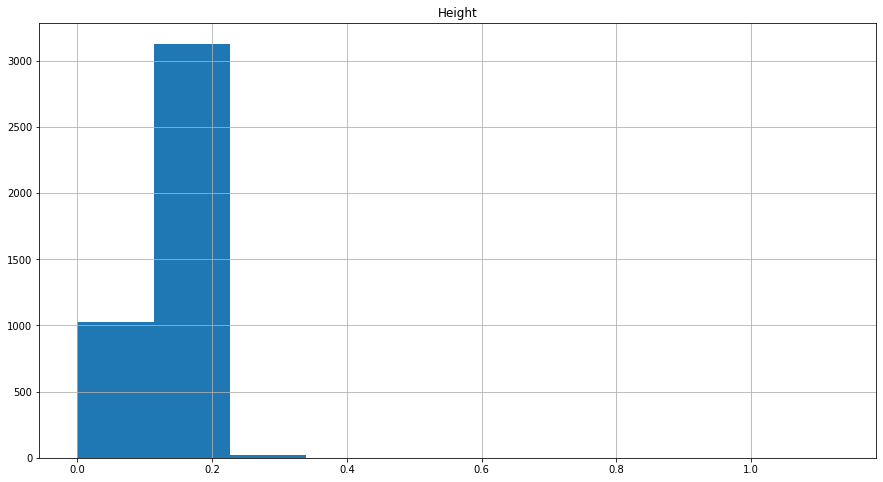

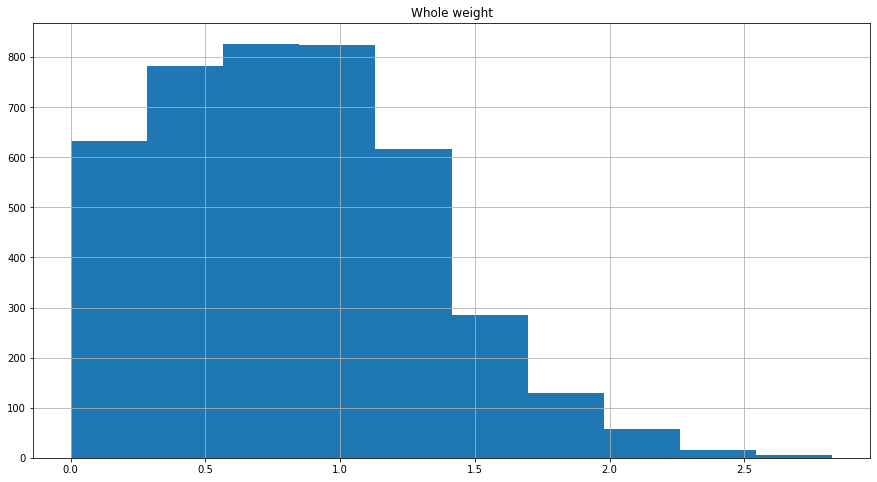

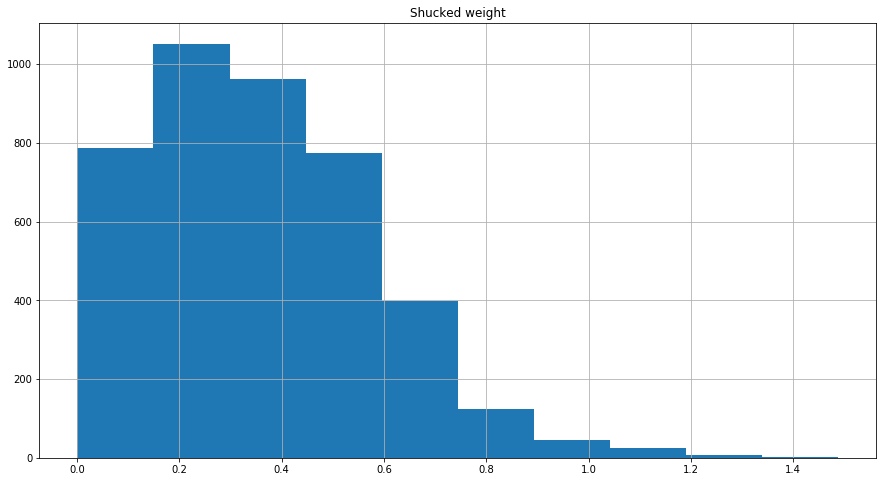

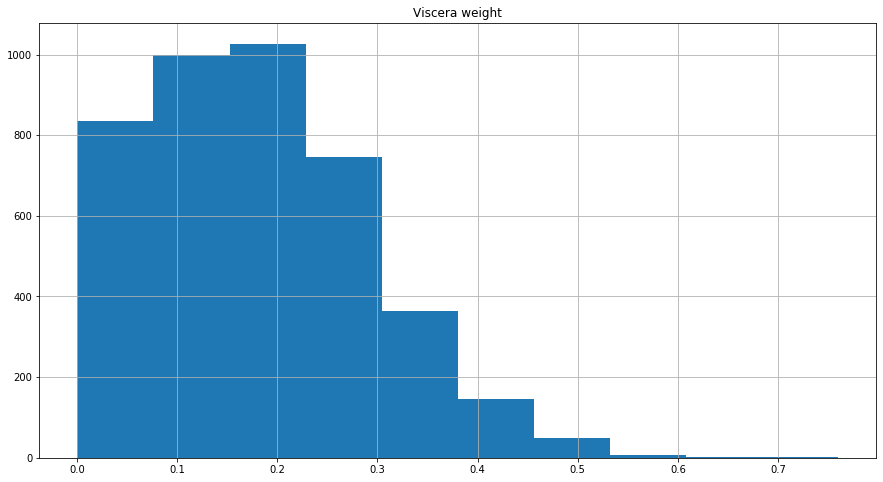

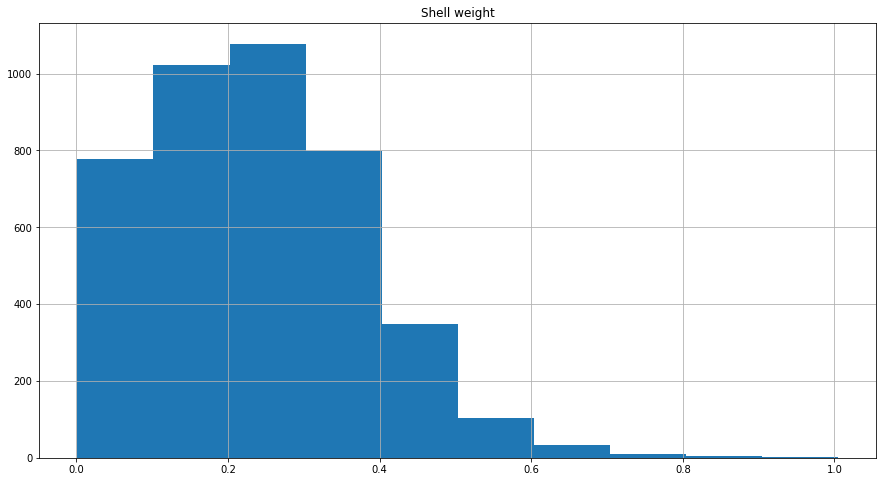

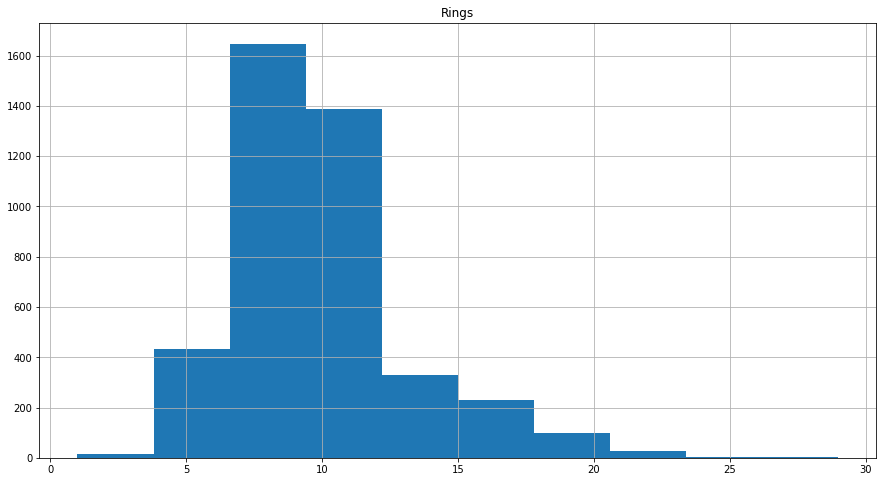

In [10]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',            #univariate analysis
       'Viscera weight', 'Shell weight', 'Rings']

for i in columns:
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

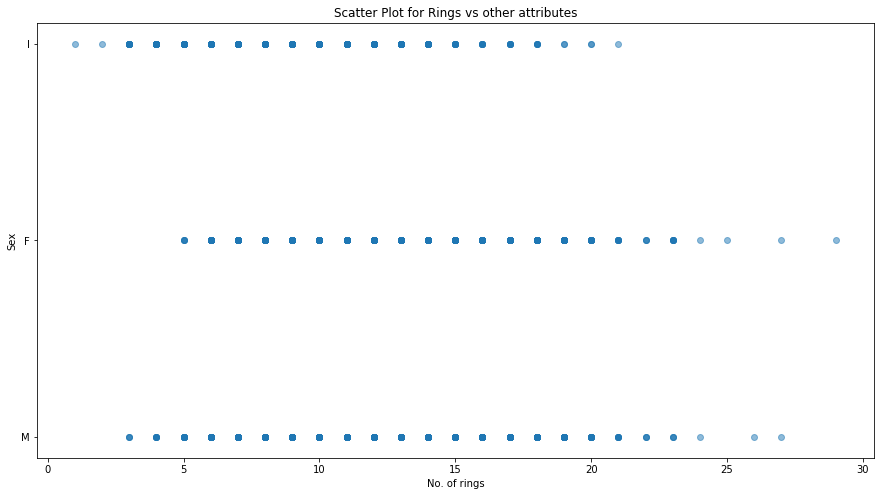

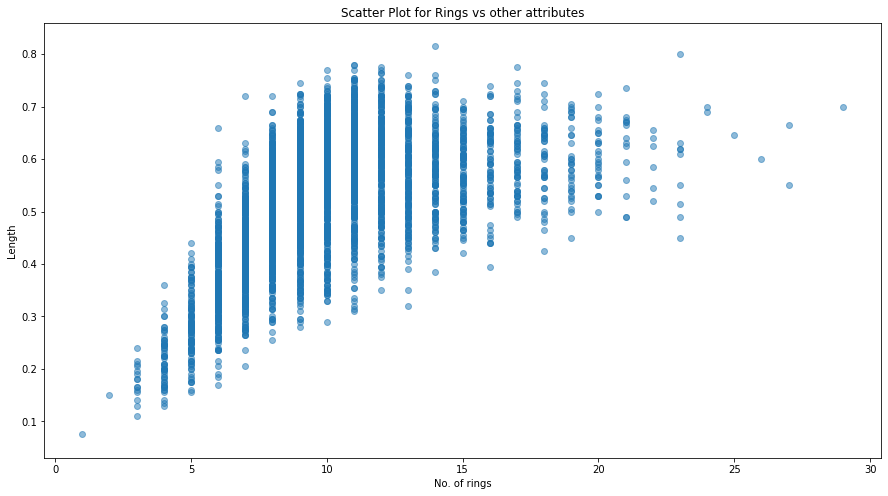

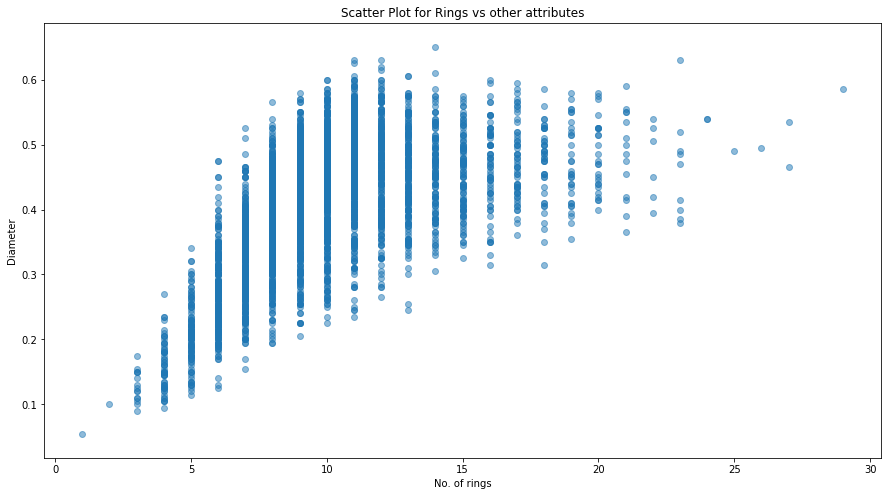

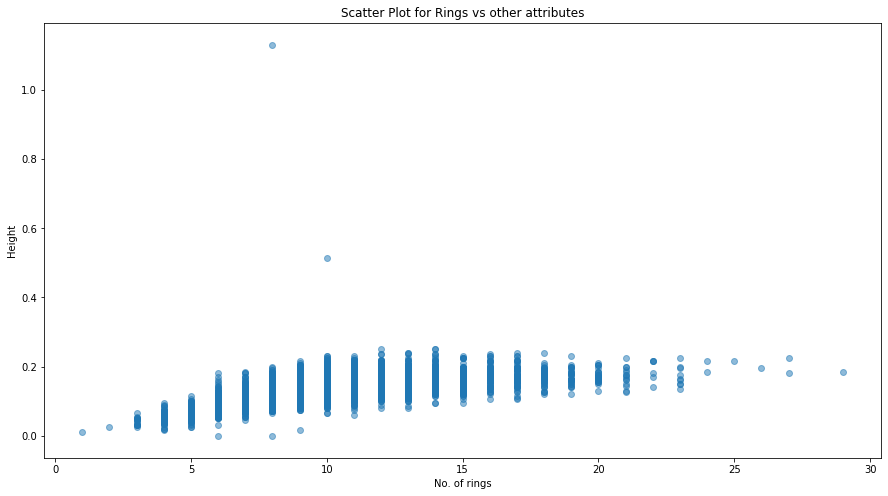

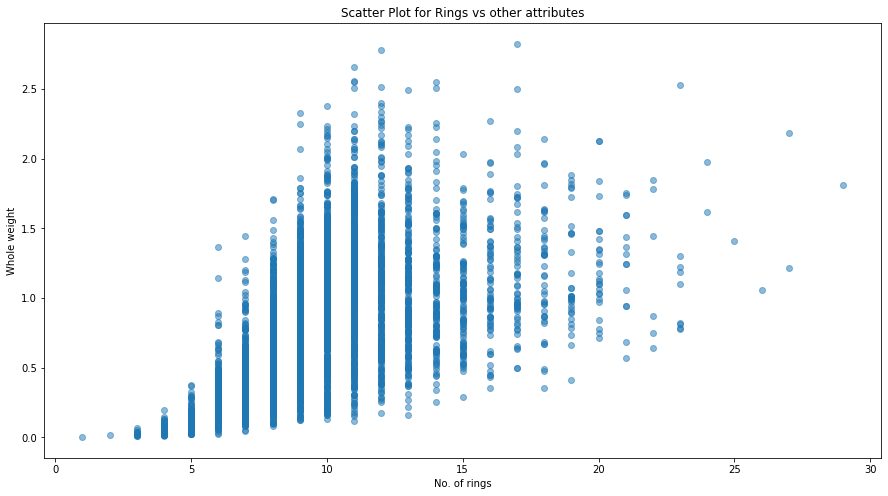

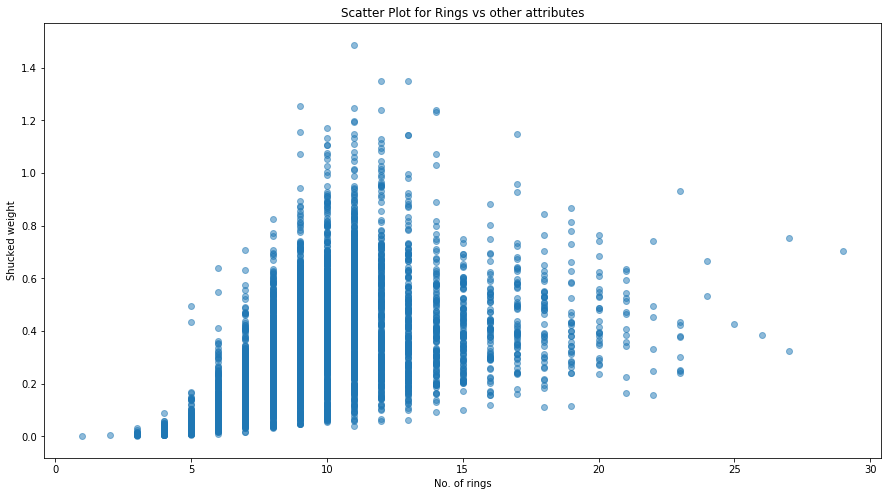

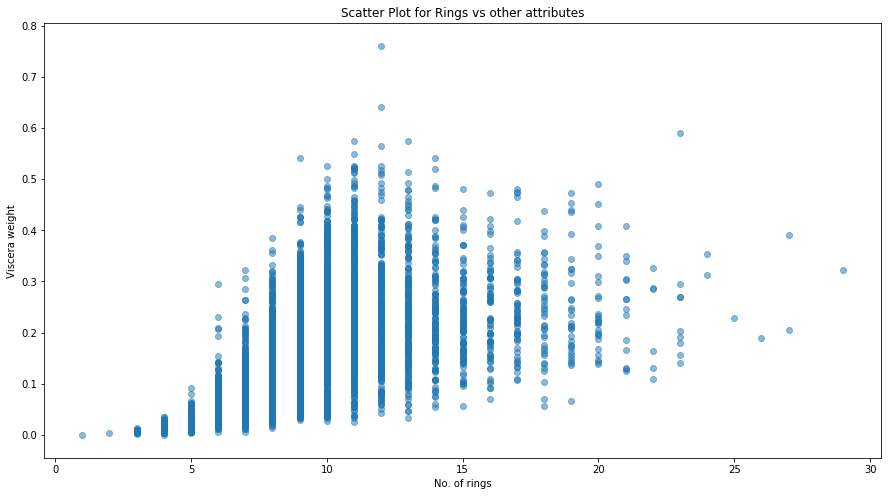

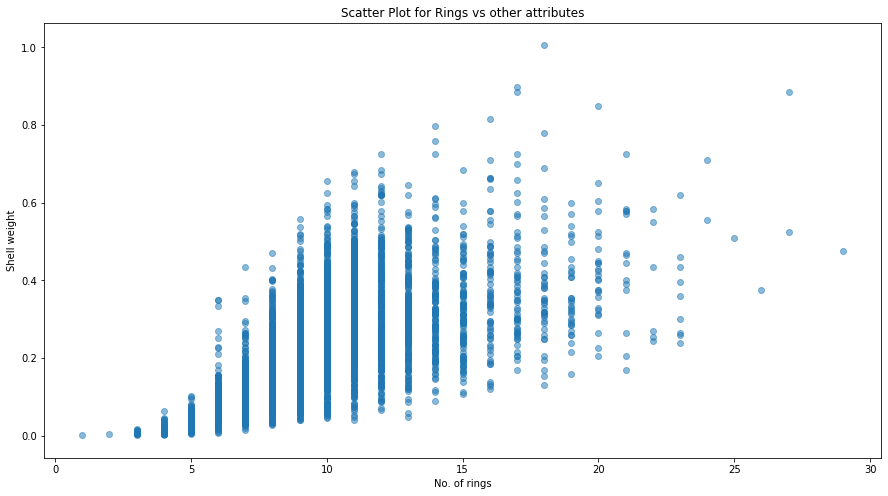

In [11]:
for i in columns[:-1]:                                      #bivariate analysis
    plt.figure(figsize = (15, 8))
    plt.scatter(df['Rings'], df[i], alpha = 0.5)
    plt.title('Scatter Plot for Rings vs other attributes')
    plt.xlabel('No. of rings')
    plt.ylabel(i)  
    plt.show()

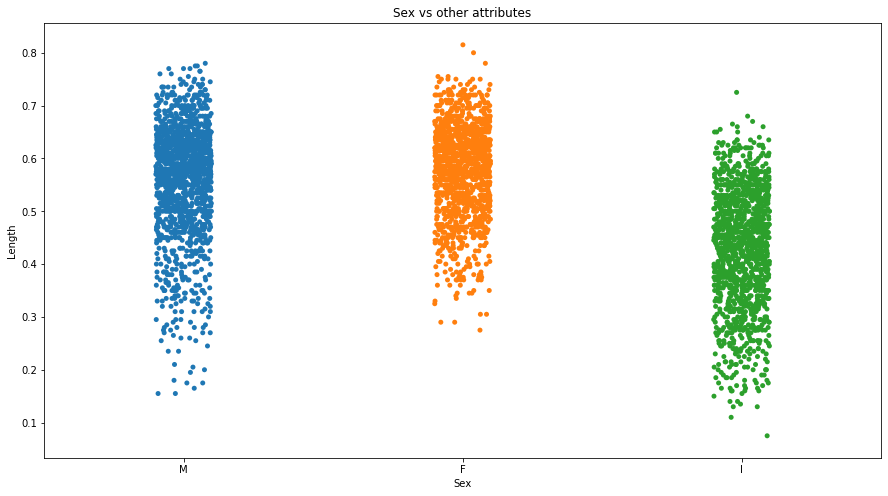

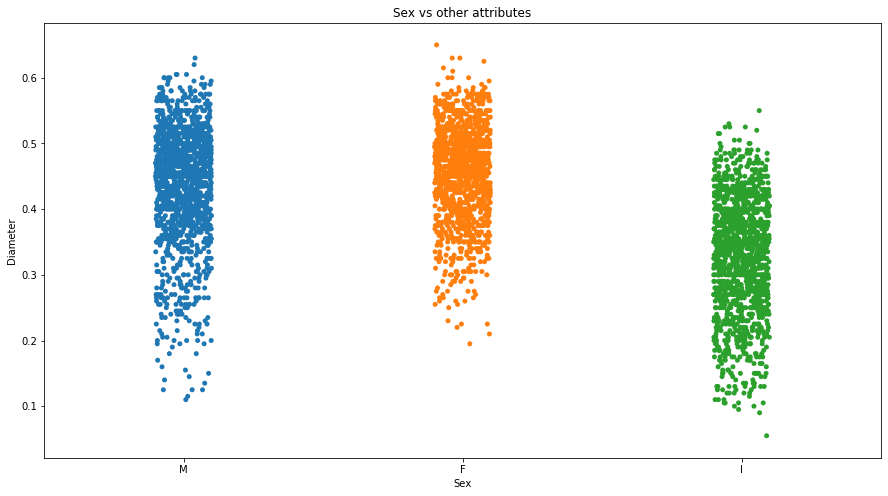

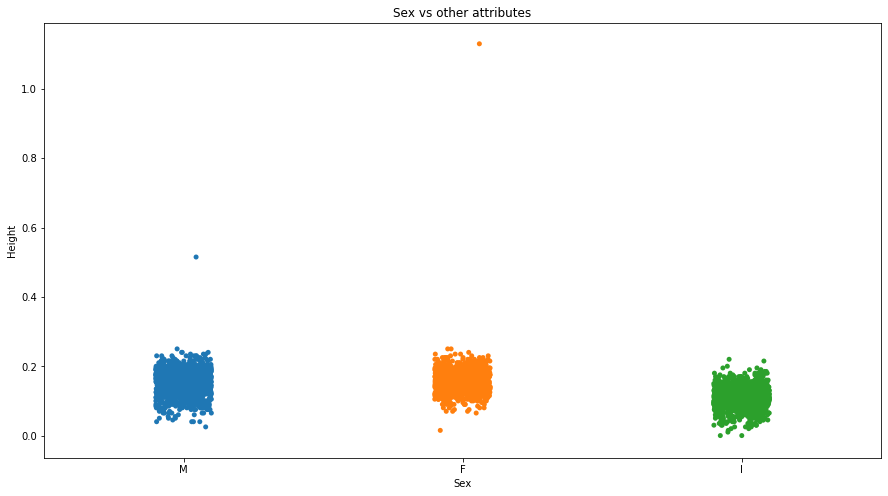

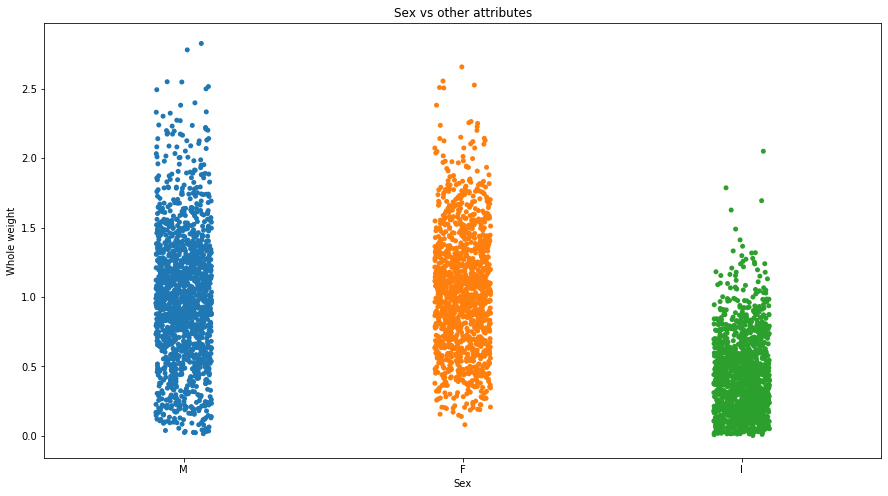

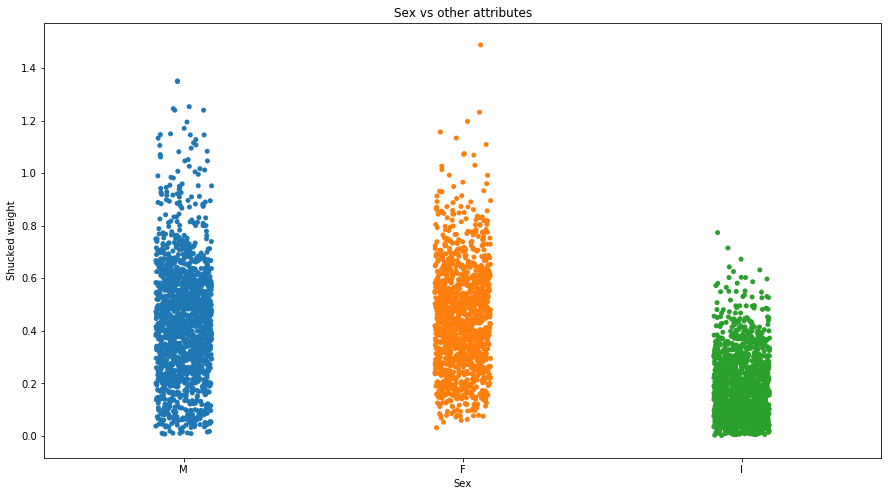

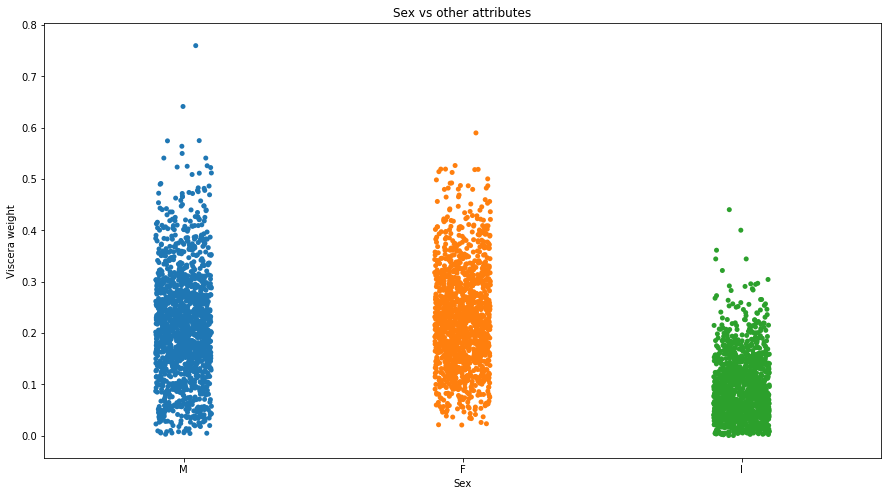

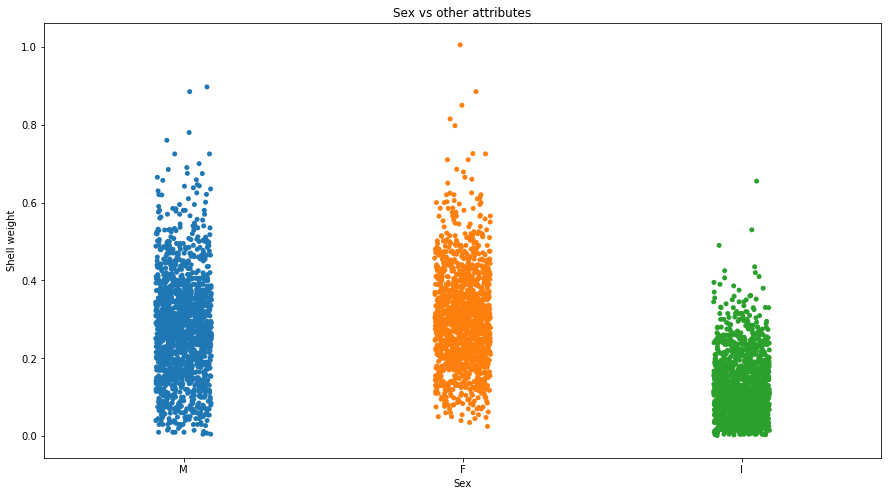

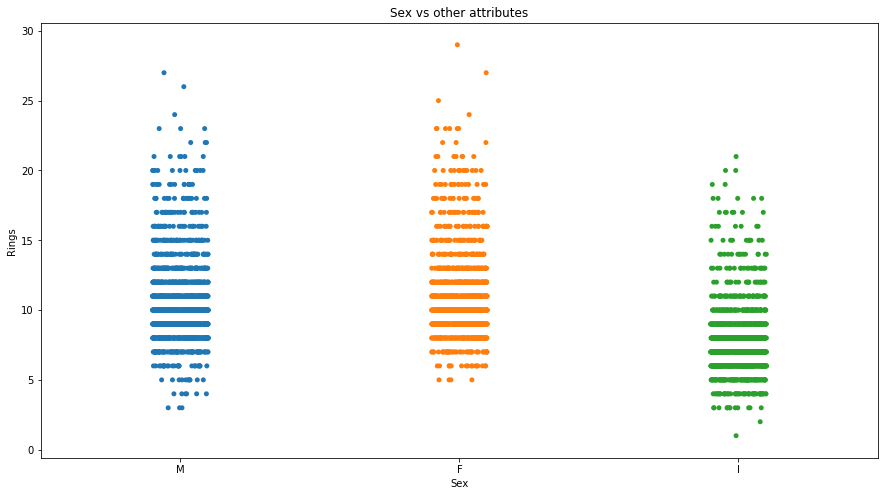

In [12]:
for i in columns[1:]:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Sex'], df[i])
    ax.set(xlabel = 'Sex', ylabel = i)
    plt.title('Sex vs other attributes')
    plt.show()

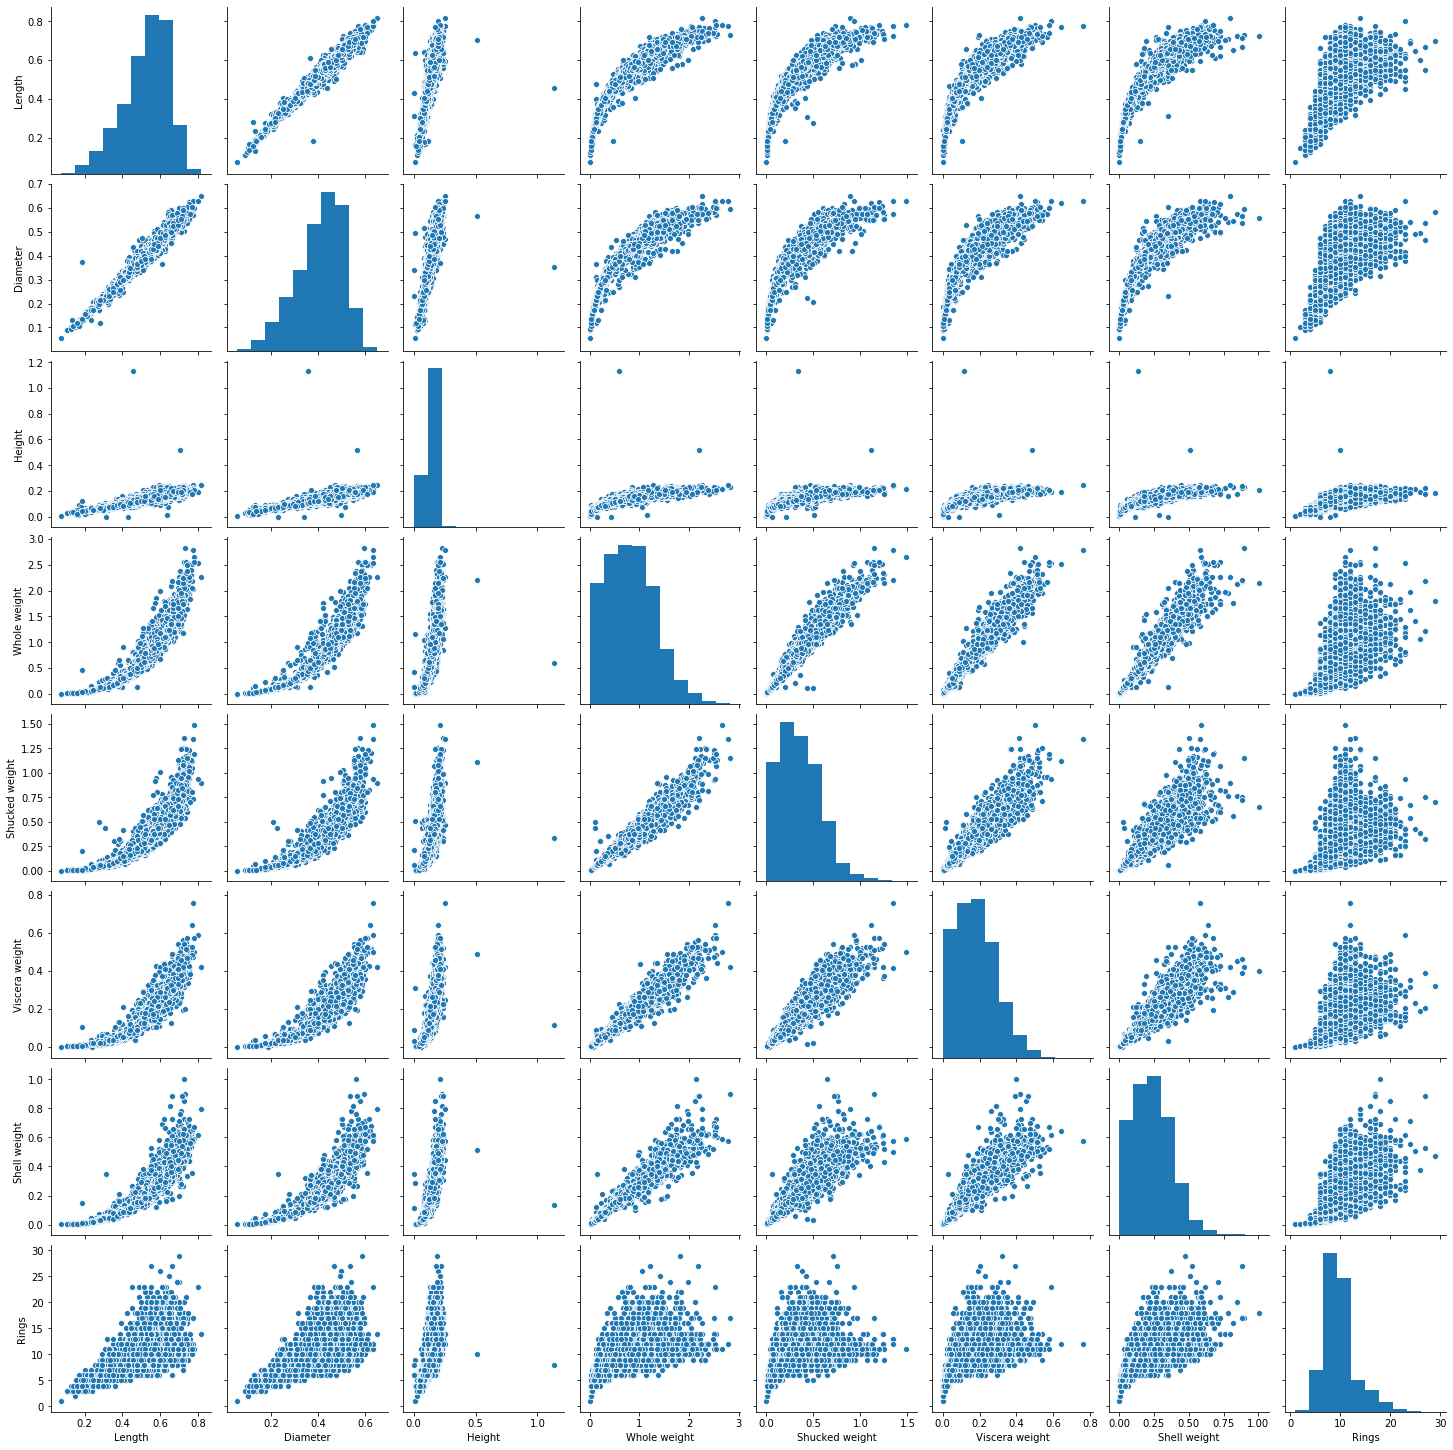

In [13]:
sns.pairplot(df)                                    #multivariate analysis

In [14]:
from sklearn.preprocessing import LabelEncoder           #converting object datatype into float

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

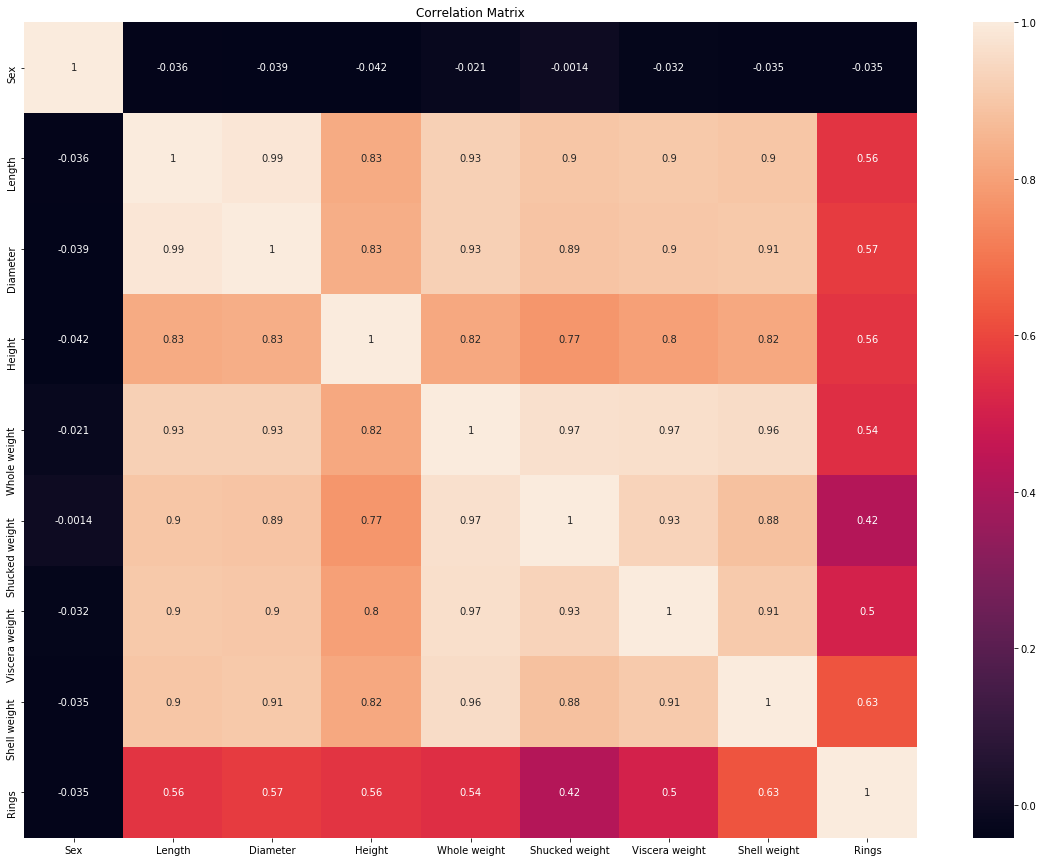

In [15]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

All columns are very highly correlated with Rings

# Outliers and Skewness

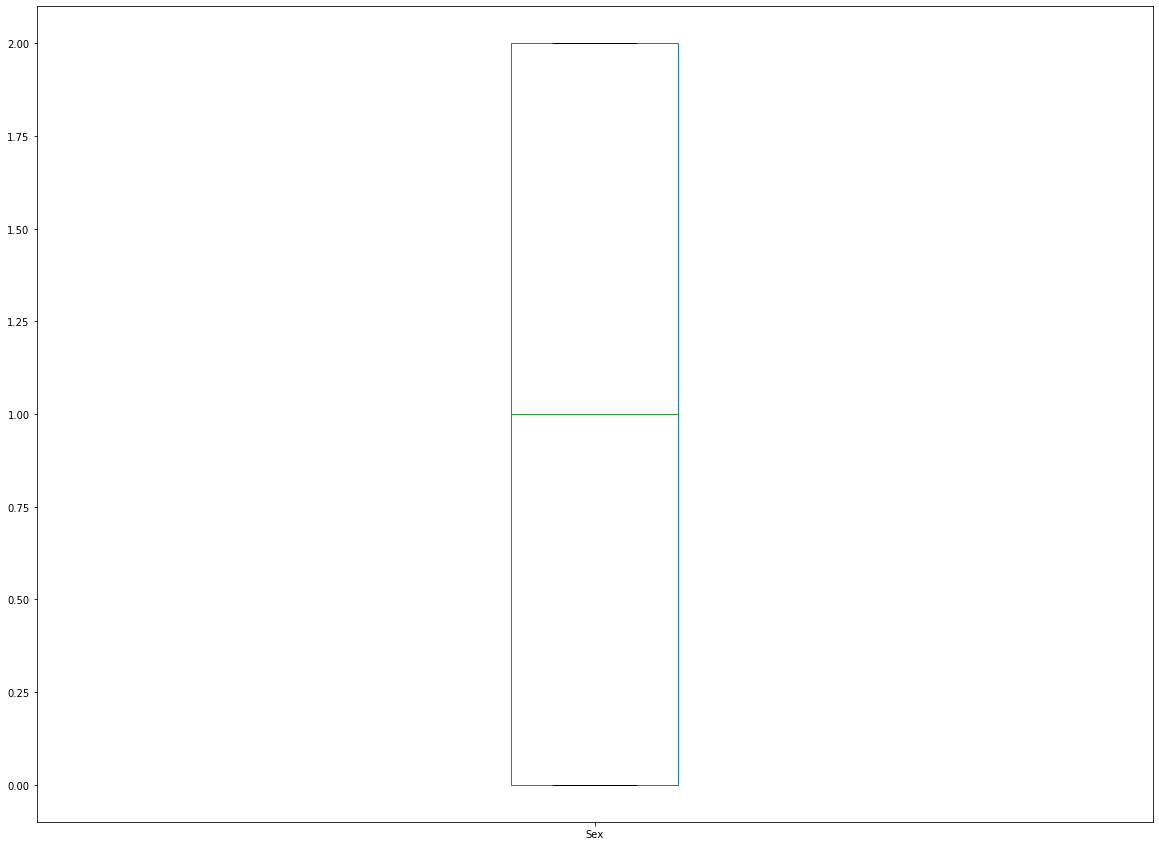

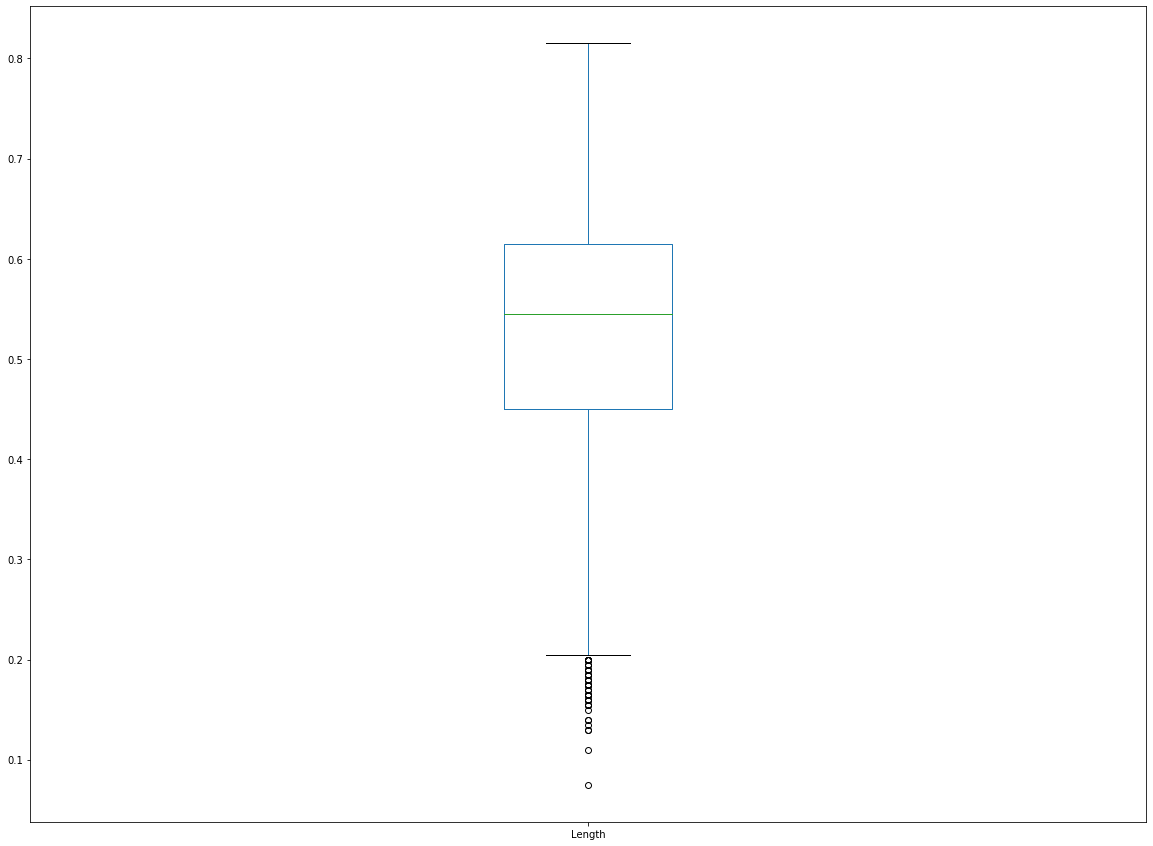

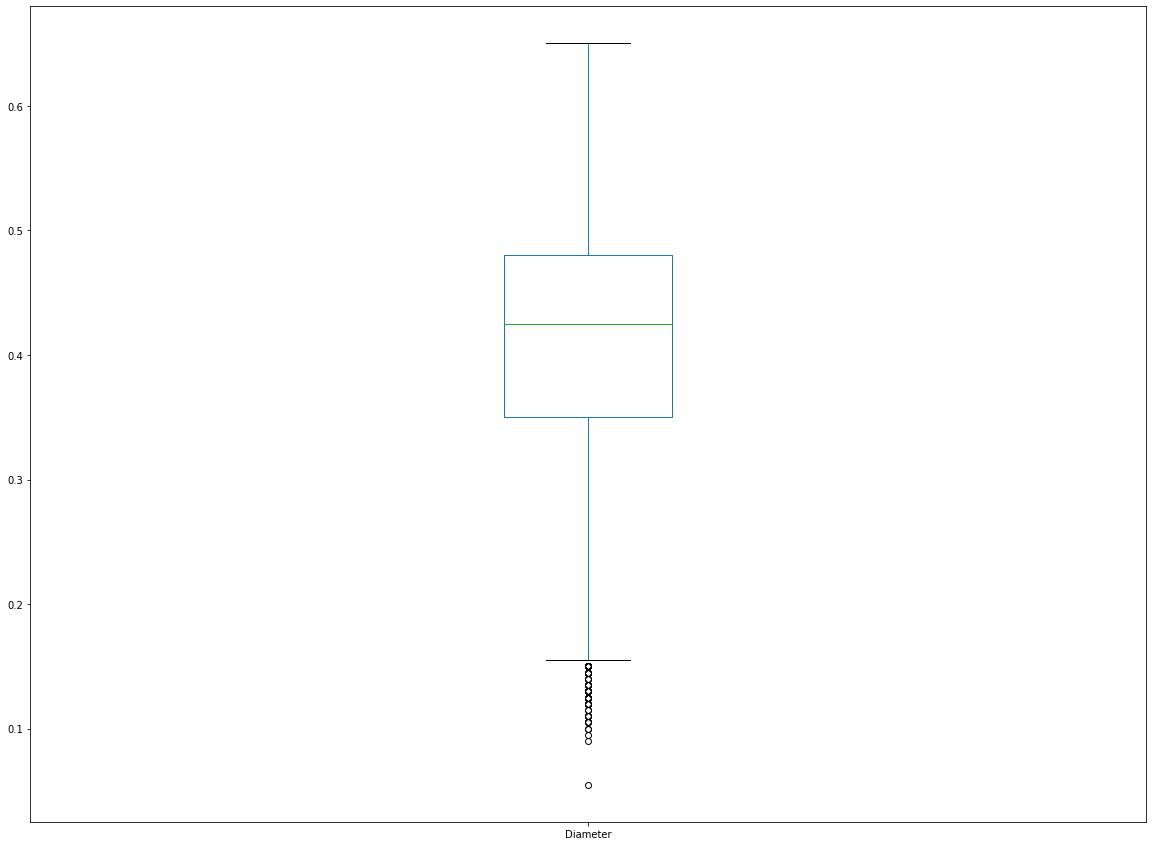

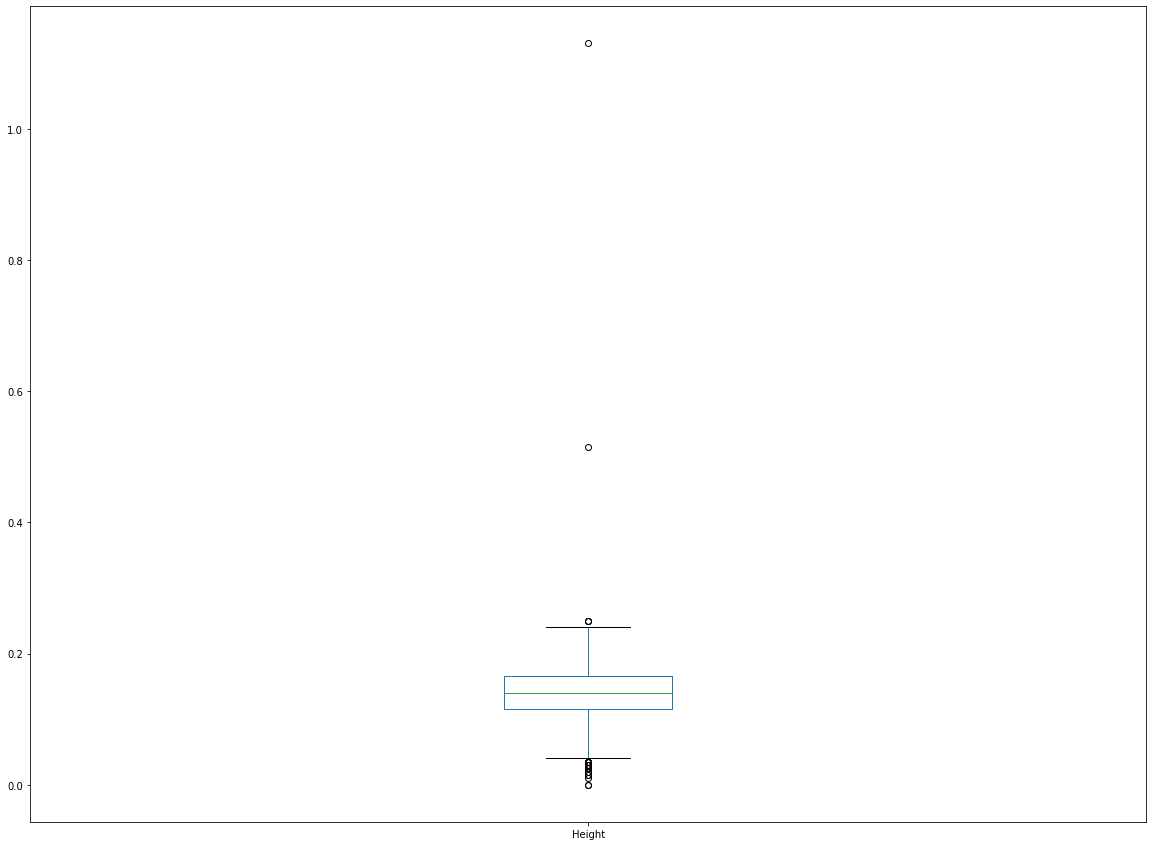

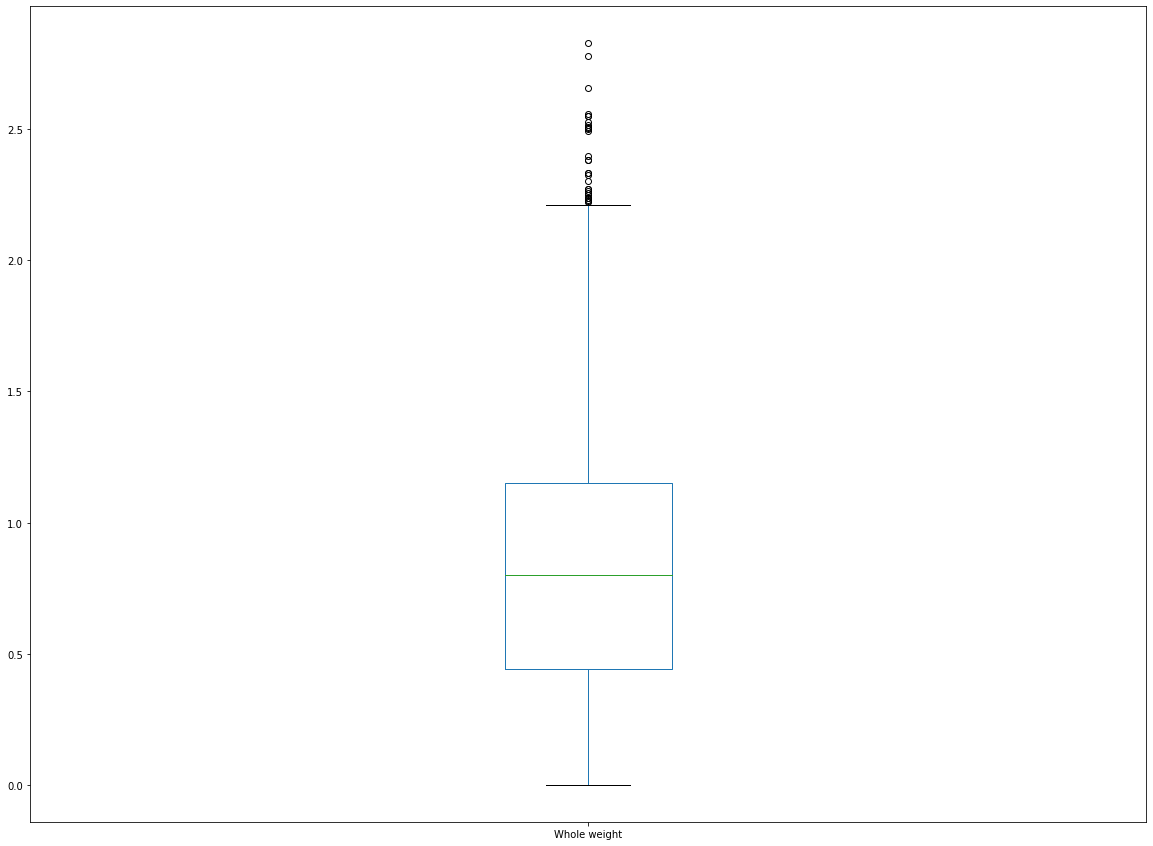

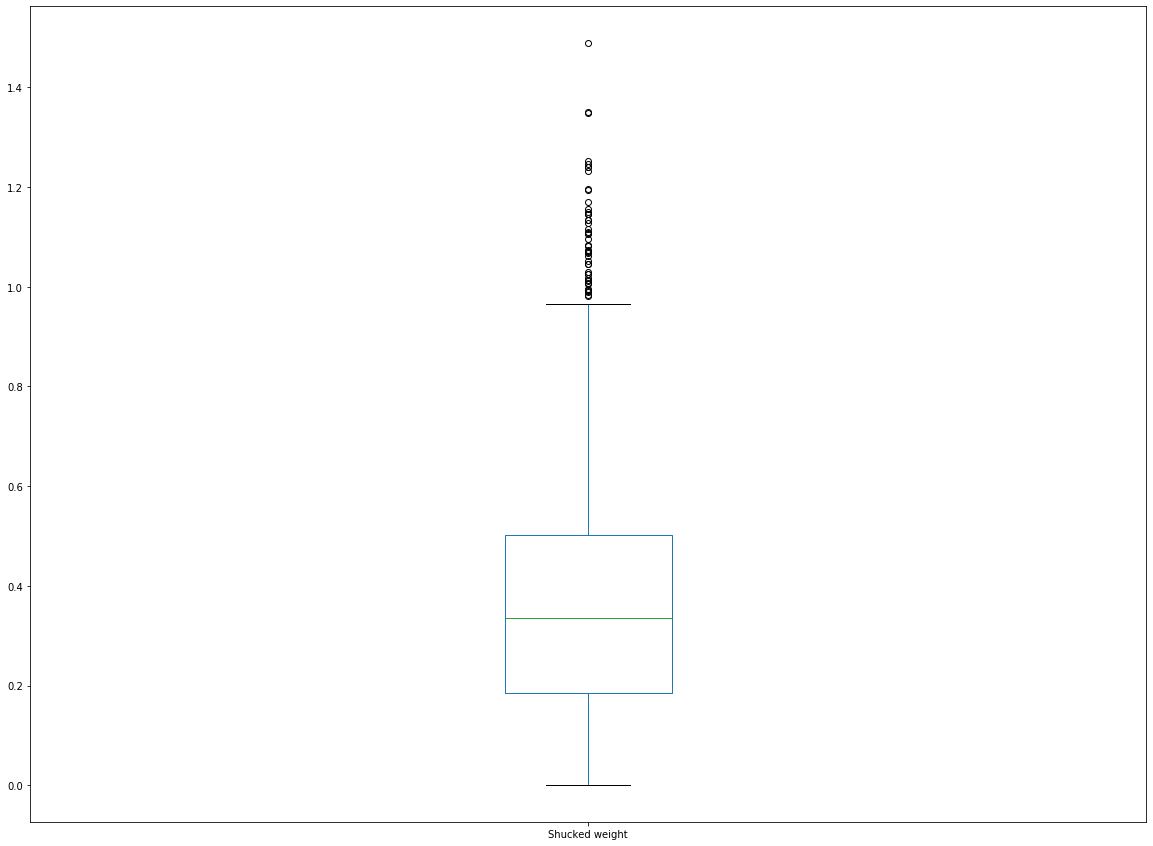

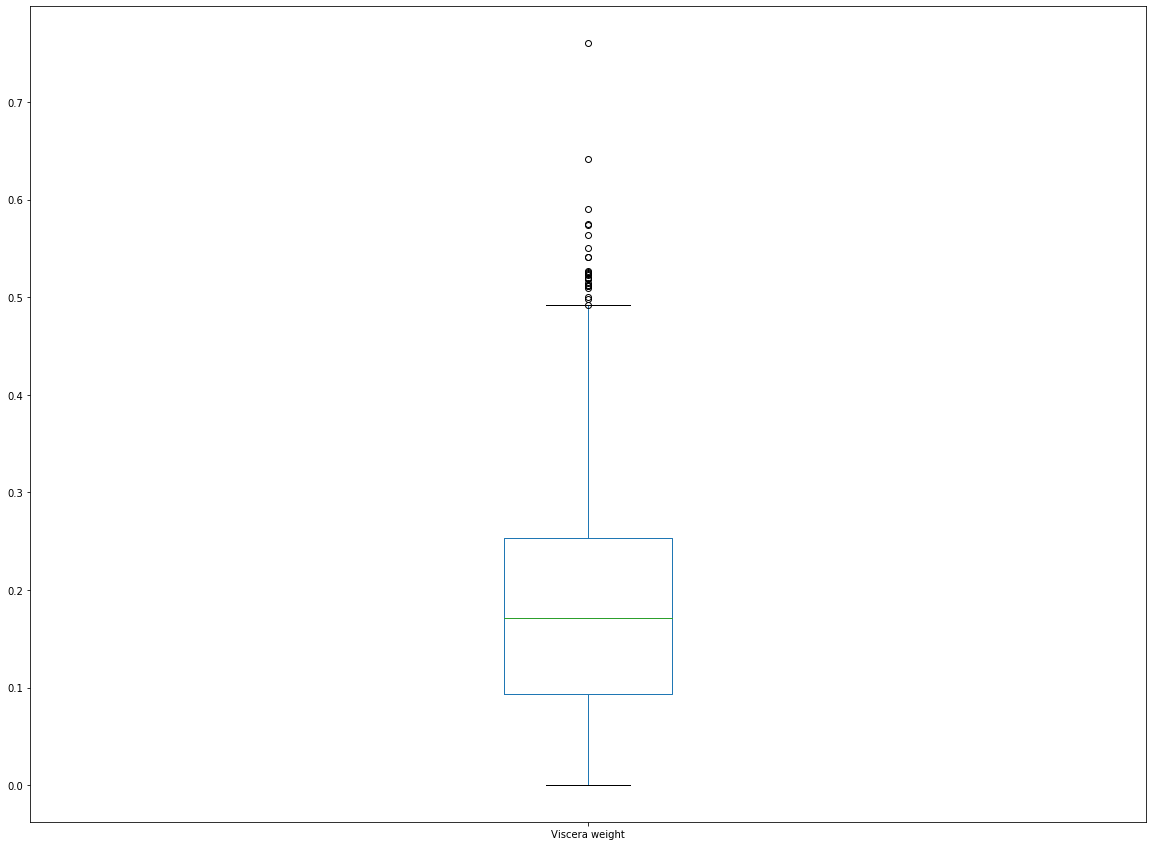

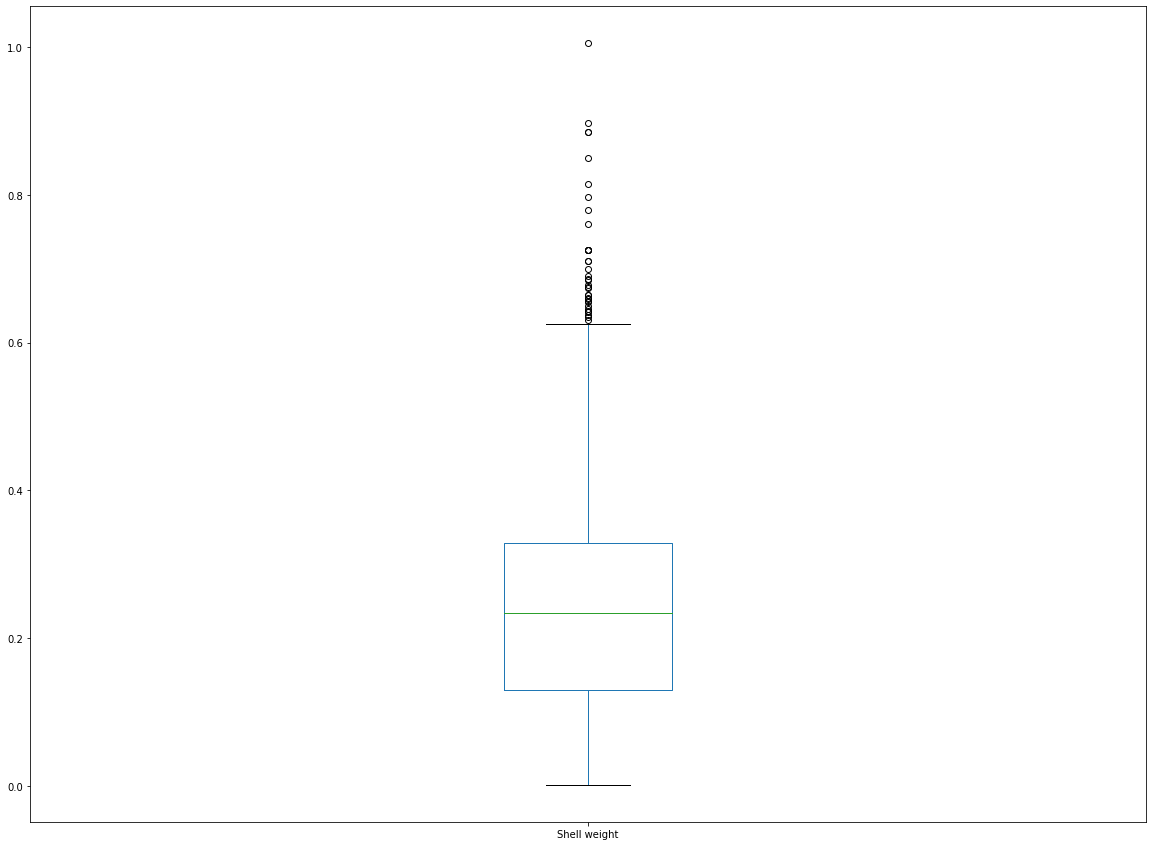

In [16]:
for i in columns[:-1]:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [17]:
x = df.drop('Rings', axis = 1)
y = df['Rings']

In [18]:
x.skew()                                 #checking for skewness

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [19]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new = power_transform(x, method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = x.columns)

In [20]:
df_new.skew()                               #skewness reduced

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [21]:
x = df_new

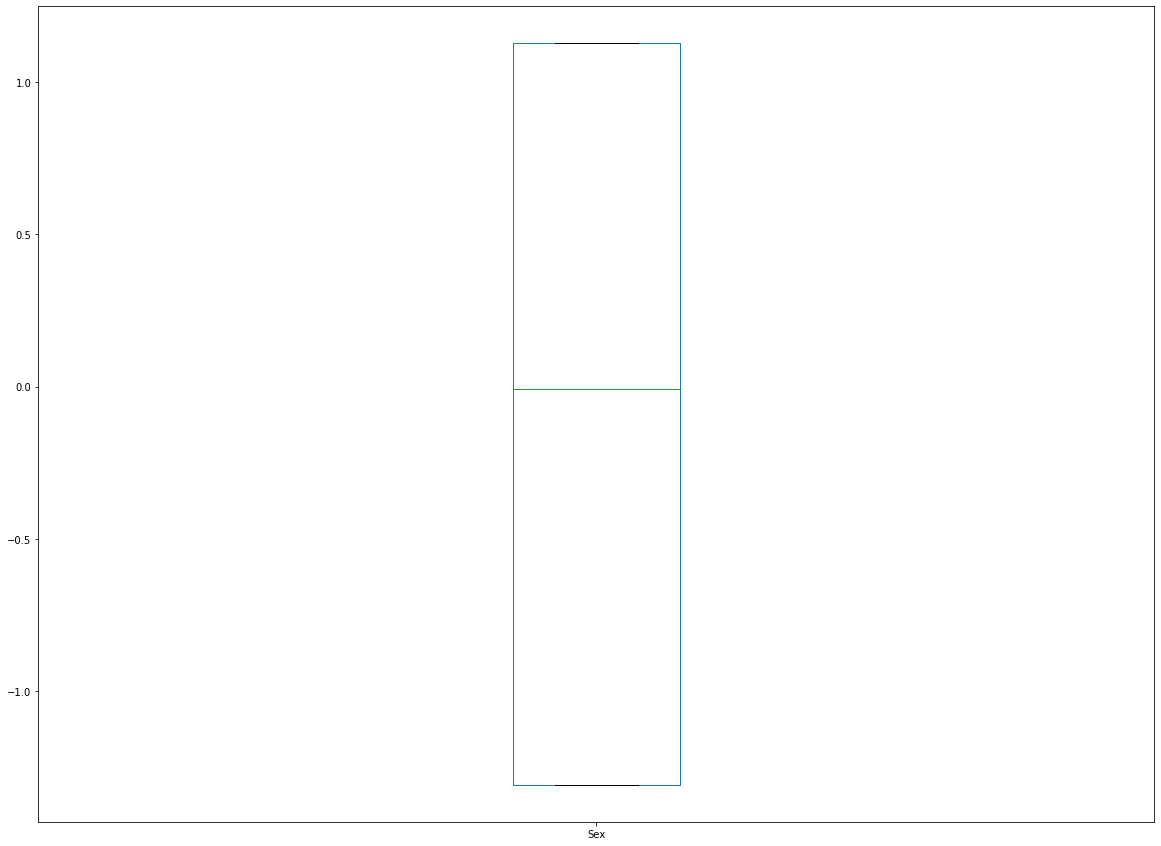

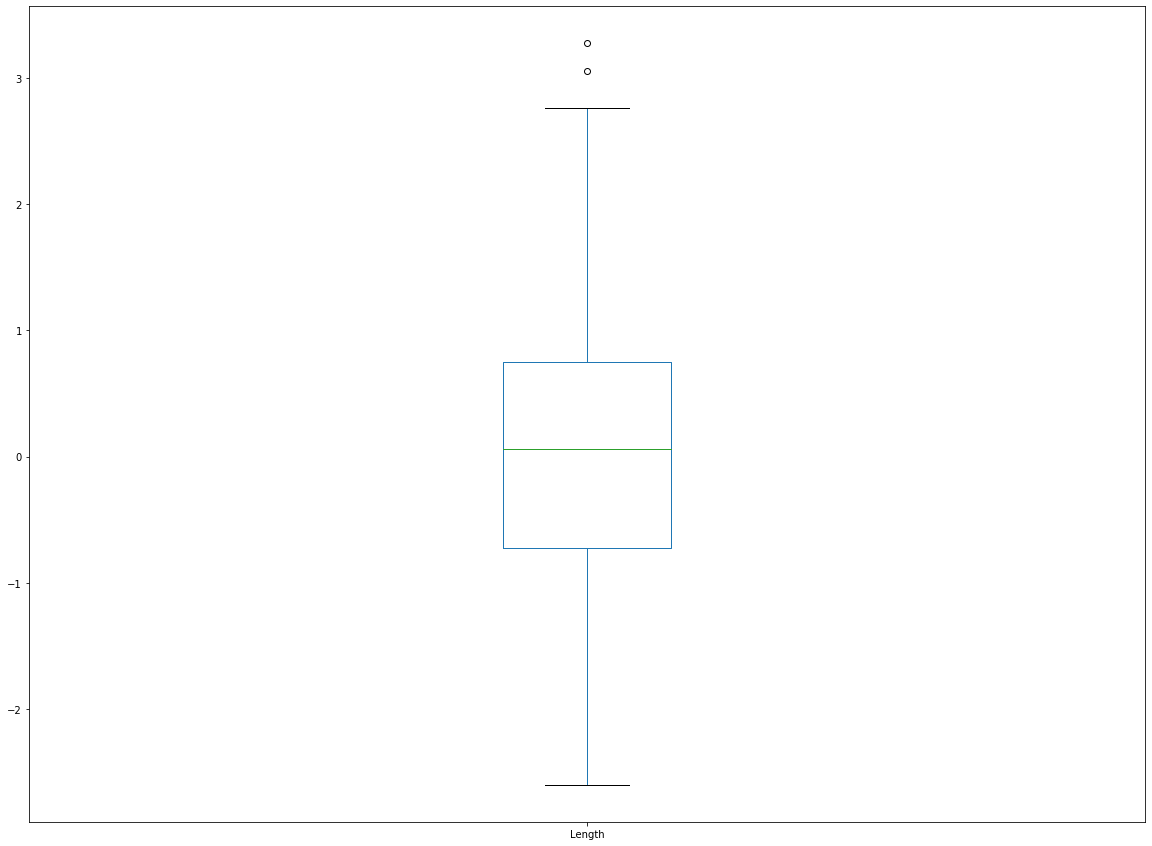

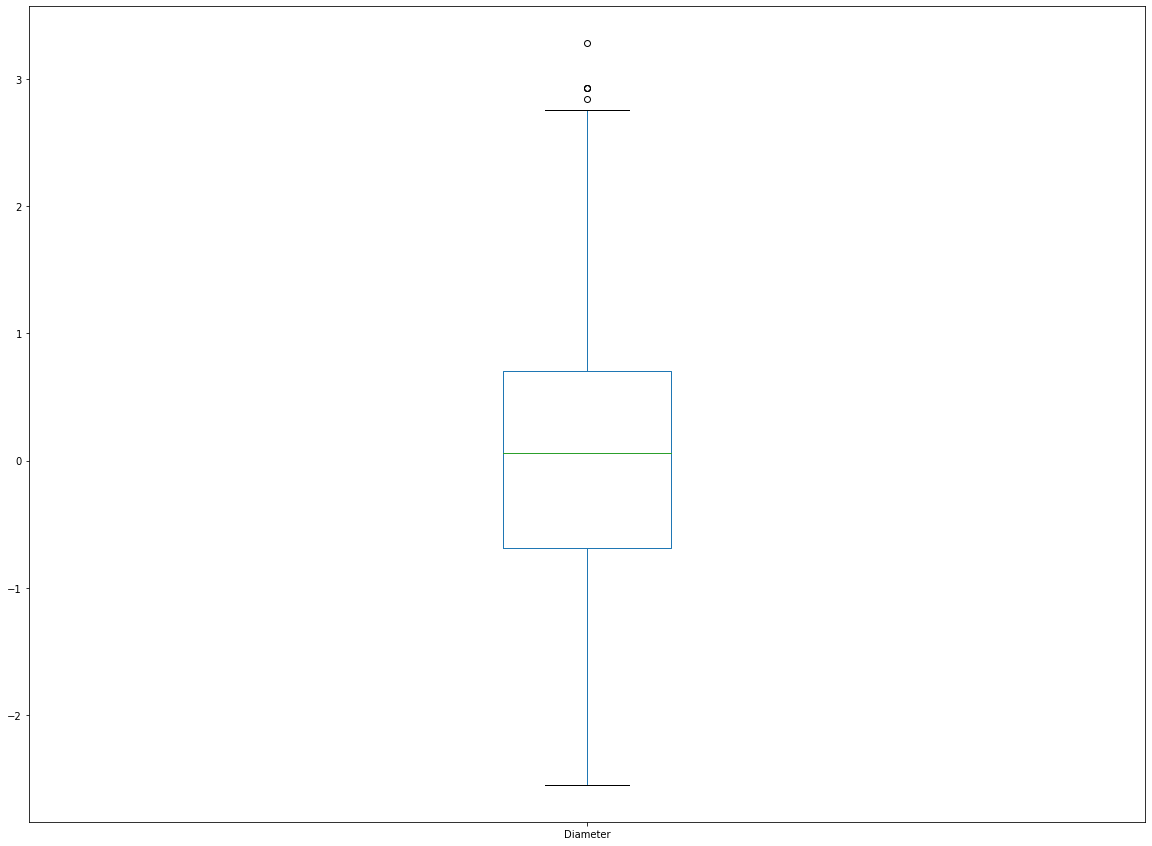

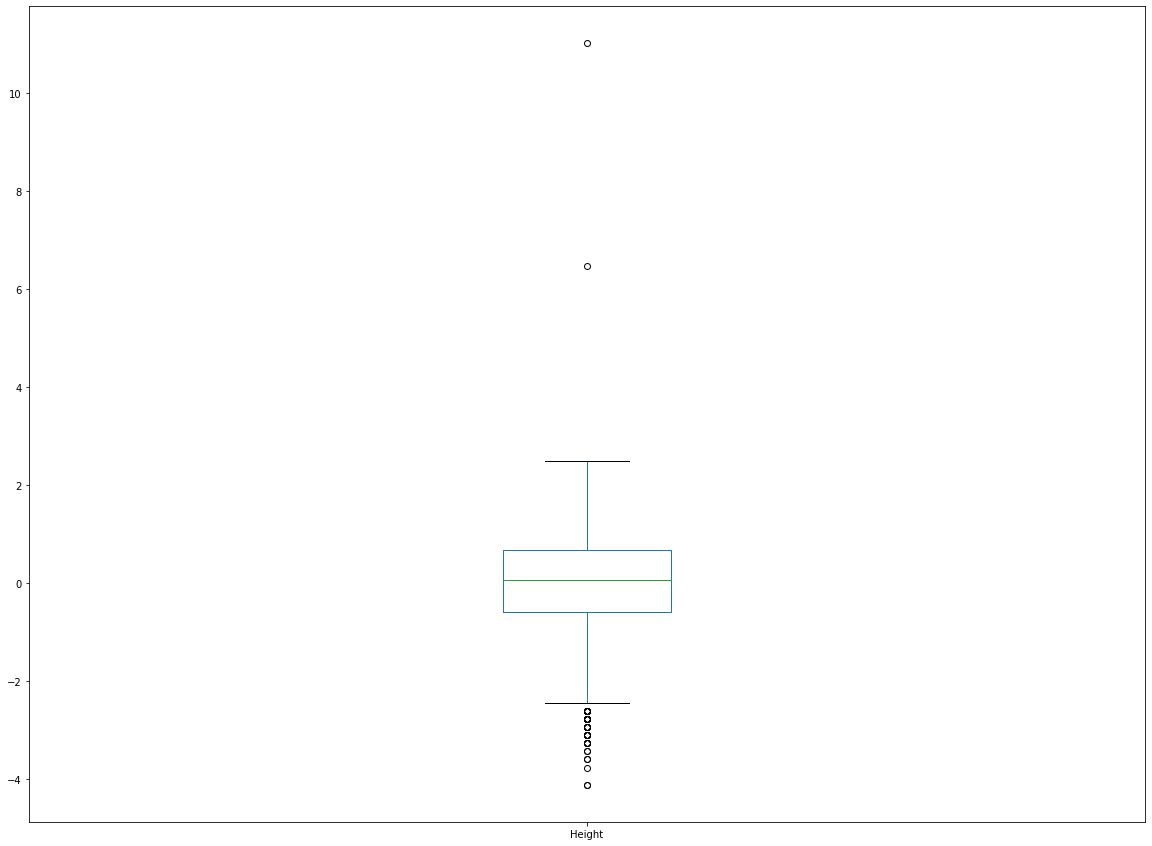

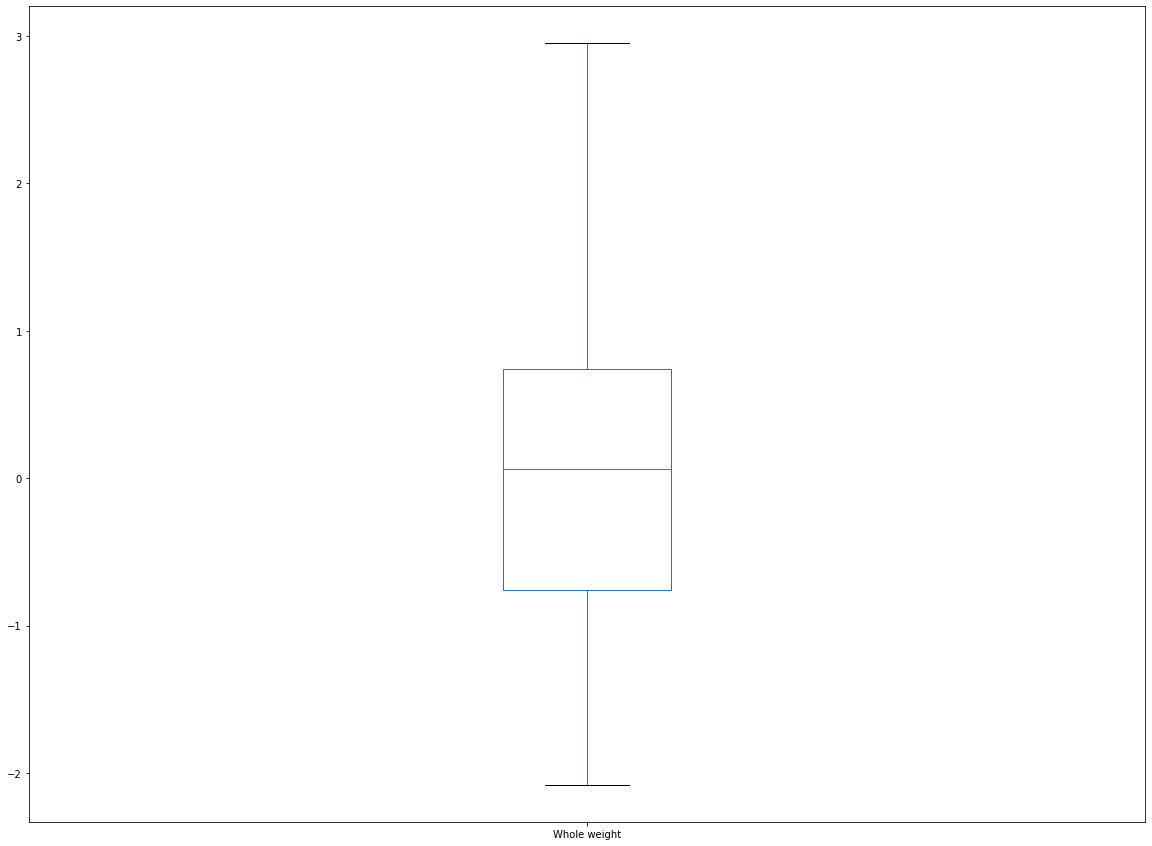

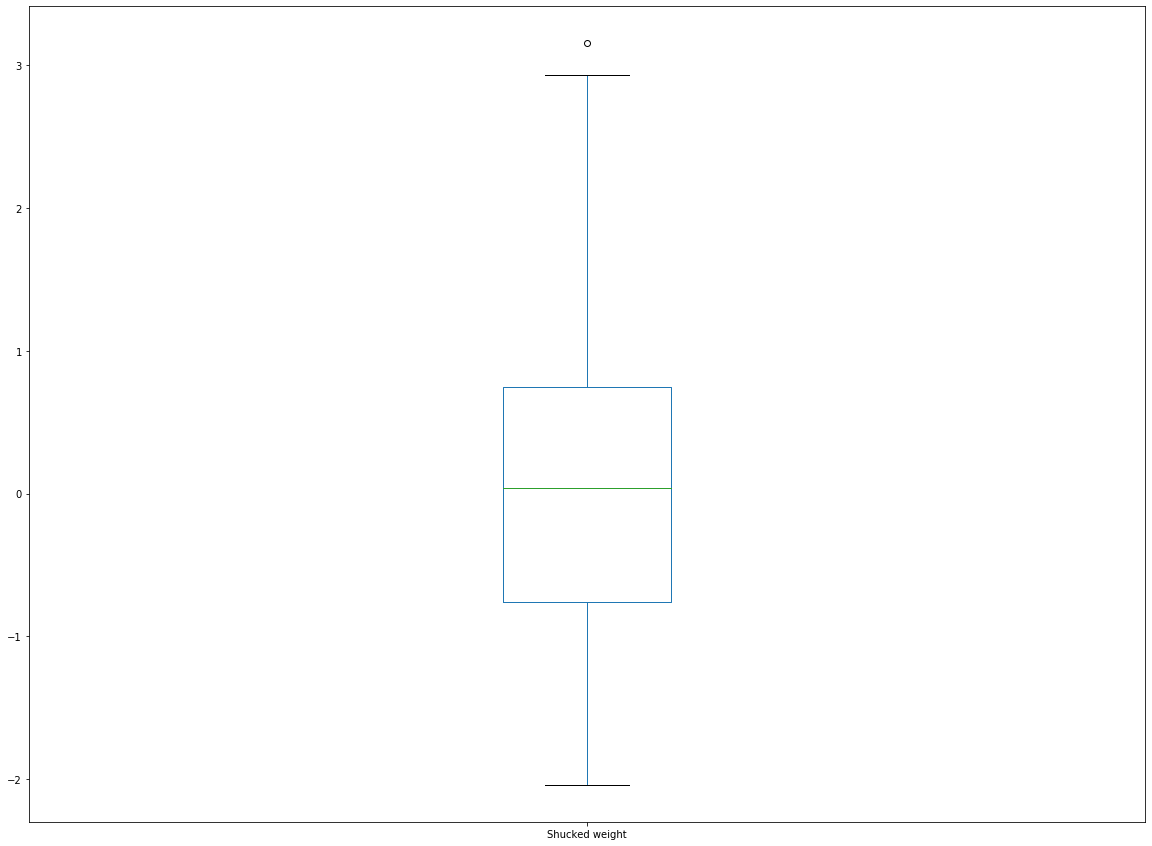

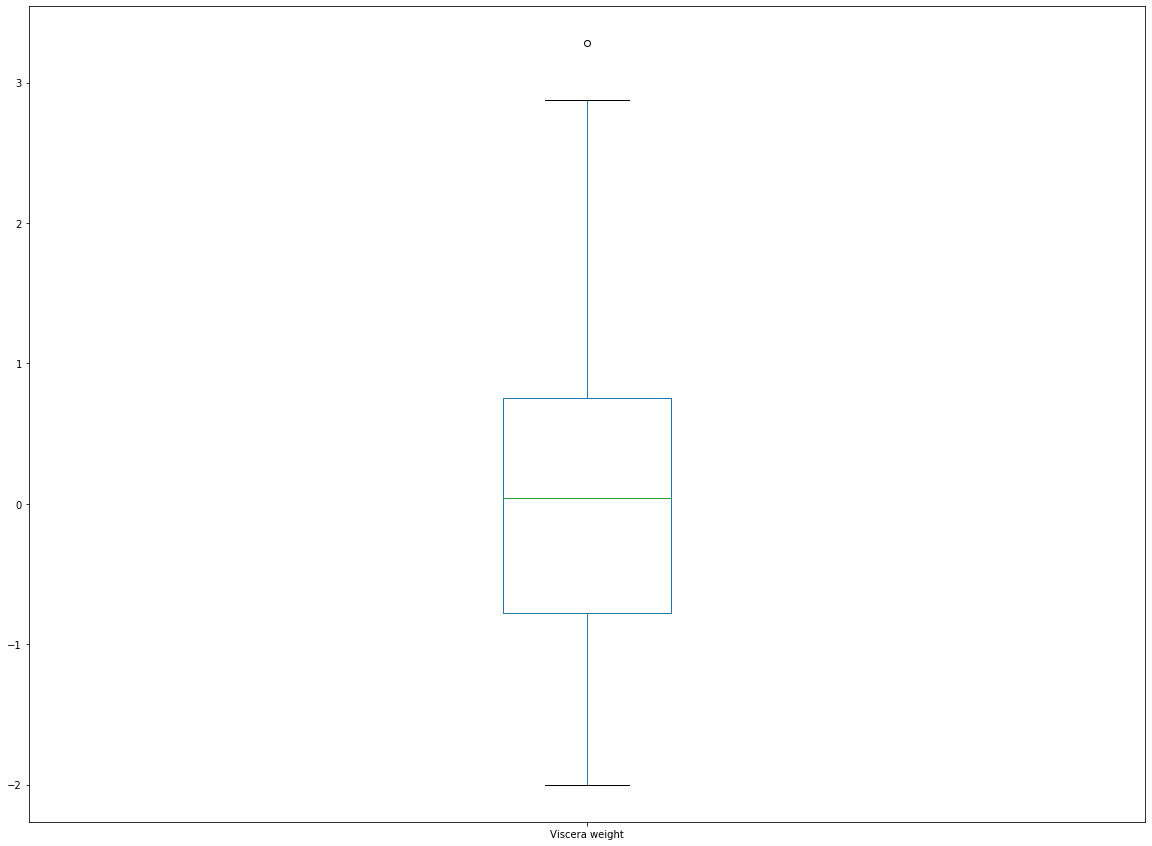

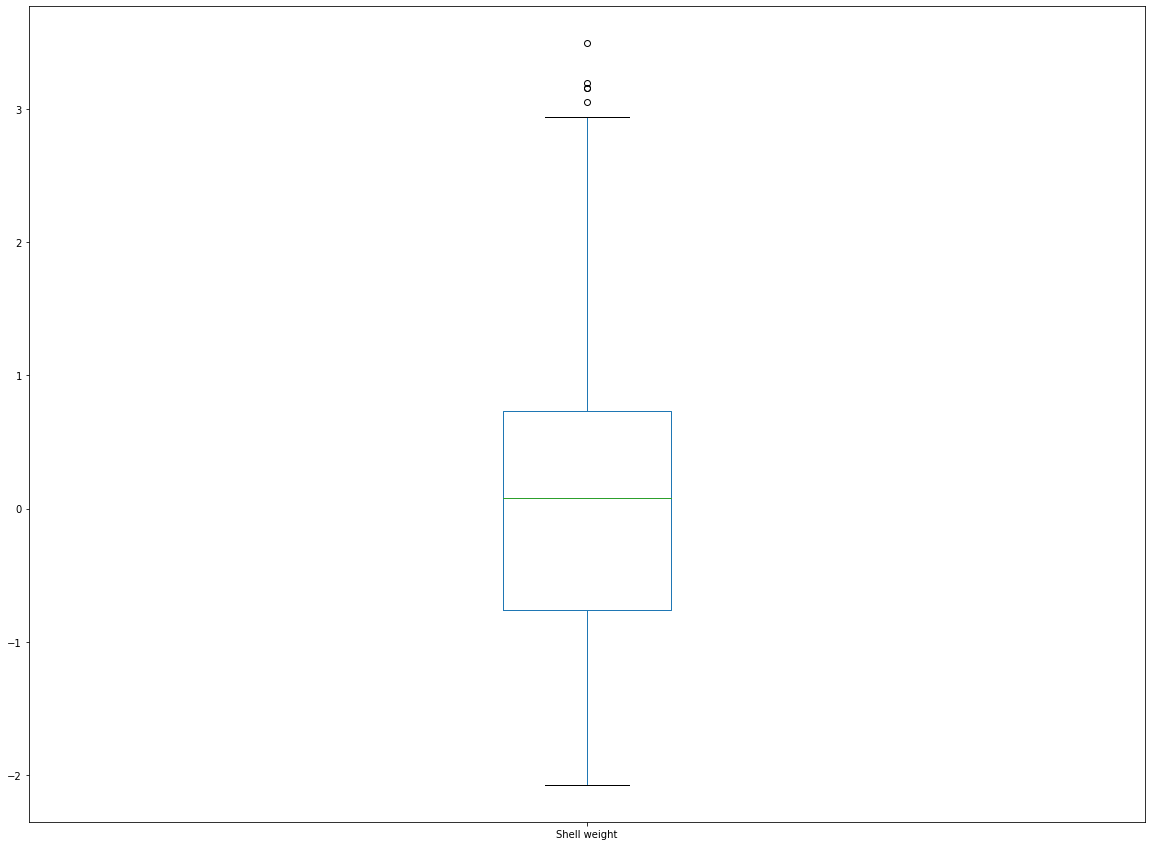

In [22]:
for i in columns[:-1]:
    plt.figure(figsize = (20, 15))
    x[i].plot.box()

Outliers reduced significant

# Best Random State

In [23]:
maxr2score = 0
maxRS = 0

for i in range (0, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.5951621473680748 on Random State 265


# Creating train test split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 265)

In [25]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print (r2_score(y_test, predlr))
print (mean_squared_error(y_test, predlr))

0.5951621473680748
4.244306468264685


In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print (r2_score(y_test, preddt))
print (mean_squared_error(y_test, preddt))

0.14732711378998387
8.93939393939394


In [27]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print (r2_score(y_test, predrf))
print (mean_squared_error(y_test, predrf))

0.5909598856741136
4.288362838915471


In [28]:
cvs = cross_val_score(LR, x, y, cv = 5, scoring='r2')
print ('Cross Validation Score for Linear Regression model is :', cvs.mean())

Cross Validation Score for Linear Regression model is : 0.4369367878804472


In [29]:
cvs = cross_val_score(dt, x, y, cv = 5, scoring='r2')
print ('Cross Validation Score for Decision Tree Regressor model is :', cvs.mean())

Cross Validation Score for Decision Tree Regressor model is : -0.14434075839826122


In [30]:
cvs = cross_val_score(rf, x, y, cv = 5, scoring='r2')
print ('Cross Validation Score for Random Forest Regressor model is :', cvs.mean())

Cross Validation Score for Random Forest Regressor model is : 0.4377323692684826


Random Forest Regressor model is the best suited model

# Hypertuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [34]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [35]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [44]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [45]:
r2_score(y_test, GCV_pred)

0.5848216811547379

In [46]:
mean_squared_error(y_test, GCV_pred)

4.352715569214148

In [48]:
rfr = RandomForestRegressor(random_state=265, max_features='log2', n_estimators= 500, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

0.5866448278325155
4.333601760594769


In [49]:
import joblib

joblib.dump(rfr, 'AbaloneRfr.obj')

['AbaloneRfr.obj']